## Pipeline for generating predictions on input tutor informations

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.pipeline import Pipeline

import re
import nltk

from nltk.corpus import stopwords
st = set(stopwords.words('english'))
#nltk.download('stopwords')
#nltk.download('wordnet') 

from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [2]:
def lemmatize(bio):
    
    stop_words = set(stopwords.words("english"))
    new_words = ["using", "show", "result", "large", "also", "one", "two", "new", "previously", "shown", 'math']
    stop_words = stop_words.union(new_words)

    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', bio)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # remove periods
    text = text.replace('.', '').replace(',' , '')
    
    #Convert to list from string
    text = text.split()
    
    ##Stemming
    stemmer=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    #text = [stemmer.stem(lem.lemmatize(word)) for word in text if not word in stop_words]
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    text = " ".join(text)
    return text

#### lists of categorized keywords, as in tutor_nlp

In [3]:
experience_list = ['experience teaching tutoring', 'experience tutoring student', 'experience working student', 
                   'many student', 'many year', 
                   'year experience teaching', 'year experience tutoring',
                   'year experience working',
                   'year teaching experience', 'year tutoring experience']
                   
welcoming_list = ['look forward hearing', 'look forward helping', 'look forward meeting', 'look forward working',
                  'forward working', 'hello name', 'hi name', 'please contact', 'please feel',
                  'would like', 'would love', 'feel free contact', 'feel free reach', 'free contact question']
                  
goal_list = ['goal help student', 'achieve academic goal',  
             'help student succeed', 'helping student achieve']

passion_list = ['enjoy helping student', 'enjoy working student', 'look forward', 
                 'believe every student', 'love help', 'love teaching', 
                 'love helping student', 'love working student', 'would love help']

#### list of popular subjects and all subjects, generated in tutor_demand

In [4]:
popular_subjects = ['Prealgebra',
 'Algebra 1',
 'Geometry',
 'Algebra 2',
 'Elementary Math',
 'Trigonometry',
 'Precalculus',
 'SAT Math',
 'ACT Math',
 'Grammar',
 'Vocabulary',
 'Calculus',
 'Elementary Science',
 'GED',
 'Reading',
 'English',
 'Proofreading',
 'Probability',
 'GRE',
 'Spelling',
 'Writing',
 'PSAT',
 'ACT Science',
 'ACT English',
 'Biology',
 'Physical Science',
 'Microsoft Word',
 'Statistics',
 'Microsoft Excel',
 'SAT Reading',
 'Chemistry',
 'SAT Writing',
 'ACT Reading',
 'Physics',
 'American History']

full_subjects_list = ['Prealgebra',
 'Algebra 1',
 'Geometry',
 'Algebra 2',
 'Elementary Math',
 'Trigonometry',
 'Precalculus',
 'SAT Math',
 'ACT Math',
 'Grammar',
 'Vocabulary',
 'Calculus',
 'Elementary Science',
 'GED',
 'Reading',
 'English',
 'Proofreading',
 'Probability',
 'GRE',
 'Spelling',
 'Writing',
 'PSAT',
 'ACT Science',
 'ACT English',
 'Biology',
 'Physical Science',
 'Microsoft Word',
 'Statistics',
 'Microsoft Excel',
 'SAT Reading',
 'Chemistry',
 'SAT Writing',
 'ACT Reading',
 'Physics',
 'American History',
 'Microsoft PowerPoint',
 'ASVAB',
 'Literature',
 'General Computer',
 'ESL/ESOL',
 'Geography',
 'TOEFL',
 'GMAT',
 'World History',
 'SSAT',
 'Anatomy',
 'Psychology',
 'Government & Politics',
 'Spanish',
 'European History',
 'Physiology',
 'Study Skills',
 'Astronomy',
 'Microeconomics',
 'Ecology',
 'HTML',
 'Macroeconomics',
 'Philosophy',
 'Java',
 'Music Theory',
 'Microbiology',
 'Biochemistry',
 'Linear Algebra',
 'Social Studies',
 'Phonics',
 'Financial Accounting',
 'Managerial Accounting',
 'Finance',
 'Differential Equations',
 'Geology',
 'Computer Programming',
 'SQL',
 'Python',
 'LSAT',
 'SPSS',
 'French',
 'Handwriting',
 'Nursing',
 'Political Science',
 'Adobe Photoshop',
 'JavaScript',
 'Art History',
 'German',
 'C',
 'Law',
 'Latin',
 'Adobe Illustrator',
 'R',
 'Art Theory',
 'Chinese',
 'Italian',
 'Japanese',
 'Portuguese',
 'NCLEX',
 'Discrete Math',
 'Romanian',
 'Elementary (K-6th)',
 'Organic Chemistry',
 'TAKS',
 'Business',
 'Public Speaking',
 'Special Needs',
 'Biostatistics',
 'Macintosh',
 'Praxis',
 'Russian',
 'Computer Science',
 'Track & Field']

#### lists of degree qualifications and top schools, generated in tutor_demand

In [5]:
undergrad = ['BA', 'B.A.', 'BS', 'B.S.', '']
postgrad = ['MS', 'M.S', 'MA', 'M.A', 'masters', 'Masters', 'CA', 'C.A', 
            'MBA', 'M.B.A', 'MD', 'M.D', 'PhD', 'Ph.D', 'Ph.D.', 'Graduate']
certified = ['education', 'Ced', 'certified']

list_of_top_schools = ['Harvard University',
 'Massachusetts Institute of Technology',
 'Stanford University',
 'University of Cambridge',
 'California Institute of Technology',
 'Princeton University',
 'University of Oxford',
 'Yale University',
 'Columbia University',
 'University of California, Berkeley',
 'University of Chicago',
 'Cornell University',
 'University of Pennsylvania',
 'University of Tokyo',
 'Johns Hopkins University',
 'Swiss Federal Institute of Technology in Zurich',
 'Kyoto University',
 'Weizmann Institute of Science',
 'University of California, Los Angeles',
 'University of California, San Diego',
 'Rockefeller University',
 'Hebrew University of Jerusalem',
 'New York University',
 'University of California, San Francisco',
 'University of Wisconsin–Madison',
 'University of Illinois at Urbana–Champaign',
 'Duke University',
 'Imperial College London',
 'University of Texas Southwestern Medical Center',
 'University of Texas at Austin',
 'Berkeley',
 'Caltech',
 'Harvard',
 'Yale',
 'Princeton',
 'MIT',
 'Stanford']

#### testing pipeline with sample input 

In [90]:
# these are validation data points

desc_input = 'Bachelors Degree in Nuclear Engineering, Years of Tutoring Experience'
bio_input = 'Hello, Im Alex! I graduated summa cum laude from Missouri S&T with a bachelors degree in nuclear engineering and a minor in mathematics. During my studies I realized that the one thing I enjoy more than learning is teaching what Ive learned to someone else. As an engineer, I do my best to teach material in a way that is not only remembered by the student, but also understood. I believe that understanding the material on a deep level sets a student up for both immediate and future victories in the classroom. I have multiple years of tutoring experience in a vast variety of subjects; however, I have mainly taught mathematics throughout my career. I have tutored middle school students, adults with full time jobs, and nearly every age in-between. My approach is always to learn about the individual and then tailor the sessions accordingly. I feel rewarded when my students do well; therefore, I do everything I can to ensure their success. I am always available and will respond in a timely manner. Feel free to contact me with any questions you may have or to schedule a lesson. I look forward to being able to help you succeed!'
schedule_input = 98
subjects_input = ['Business', 'Microsoft Excel', 'Microsoft PowerPoint', 'Elementary Math', 'Algebra 1' , 'Algebra 2', 'Calculus', 'Geometry', 'Prealgebra', 'Precalculus']
edu_input = 'BS Missouri University of Science and Technology Nuclear Engineering'
rate_input = 80.0

In [85]:
# these are validation data points

desc_input = 'Math Tutor with Reputation to make difficult concepts understandable'
bio_input = 'I started teaching 8th grade mathematics in the early 70s. Each year after that I moved onto the next grade level, teaching Algebra, Geometry, Trigonometry, Math Analysis, Probability, and Calculus. One set of students moved with me from 8th through 12th grade. When they graduated, they all got t-shirts with Mr C. 5-year letterman emblazoned on the back. I also taught night school at the local university and took night classes at the same time in order to get my Masters in Mathematics. I gave up teaching to become a computer programmer in the early 80s, which I still am doing. One of my 5-year letter students sent me a letter after her first year in college where she blew away the curve on the first pre-calculus final. When asked how she did so well: "because I am a Mr C. 5-year letterman. She expressed how grateful she was to have had me as her mathematics teacher for 5 consecutive years. My philosophy on tutoring-teaching is to make sure students are learning to think logically and for themselves.'
schedule_input = 25
subjects_input = ['Algebra 1', 'Algebra 2', 'Calculus', 'Geometry', 'Prealgebra', 'Precalculus','Trigonometry']
edu_input = 'Mount Union College Mathematics, Youngstown State University Masters'
rate_input = 30.0

In [91]:
# functions to generate needed features

bio_input_lemm = lemmatize(bio_input)

number_subjects = len(subjects_input)

num_popular_subjects = 0
for f in subjects_input:
    if f in popular_subjects:
        num_popular_subjects += 1

desc_count = len(desc_input.split(' '))
bio_count = len(bio_input_lemm.split(' '))

experience_count = 0
welcoming_count = 0
goal_count = 0
passion_count = 0
for b in bio_input_lemm:
    if any(x in b for x in experience_list):
        experience_count += 1
    if any(x in b for x in welcoming_list):
        welcoming_count += 1
    if any(x in b for x in goal_list):
        goal_count += 1
    if any(x in b for x in passion_list):
        passion_count += 1

number_degrees = edu_input.count(',') + 1

undergrad_count = 0
postgrad_count = 0
certified_count = 0
if any(x in edu_input for x in undergrad):
    undergrad_count += 1
if any(x in edu_input for x in postgrad):
    postgrad_count += 1
if any(x in edu_input for x in certified):
    certified_count +=1

top_school = 0
if any(x in edu_input for x in list_of_top_schools):
    top_school += 1

### Rate Pipeline

In [92]:
important_features_rate = ['number_subjects', 
                           'top_school', 
                           'hours_per_week_schedule', 
                           'bio_count', 
                           'number_degrees', 
                           'desc_count', 
                           'num_popular_subjects']

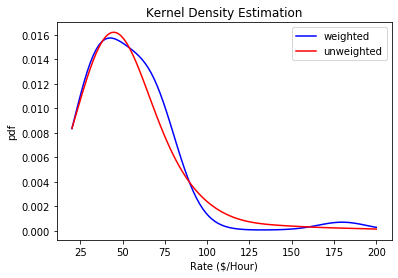

In [93]:
rate_data = pd.read_csv('/Users/NewUser/Documents/GitHub/tutor_prediction/tutor_prediction/data/tutor_data_rate.csv').drop(columns='Unnamed: 0')
rate_data_f = rate_data.drop(columns=['rate'])
rate_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA(n_components=3))
        ])
rate_pipe.fit(rate_data_f)
rate_trans = rate_pipe.transform(rate_data_f)
rate_data_test = [number_subjects, 
                  top_school, 
                  schedule_input, 
                  bio_count, 
                  number_degrees, 
                  desc_count, 
                  num_popular_subjects]
input_rate = rate_pipe.transform(np.array(rate_data_test).reshape(1,-1))
weights_rate = (1. / np.linalg.norm(input_rate - rate_trans, axis=-1))

rate_gkde = stats.gaussian_kde(rate_data.rate, bw_method = 0.5, weights=weights_rate**4)
rate_gkde_none = stats.gaussian_kde(rate_data.rate, bw_method = 0.5, weights=None)
rate_ind = np.linspace(20, 200, 101)
rate_kdepdf = rate_gkde.evaluate(rate_ind)
rate_kdepdf_none = rate_gkde_none.evaluate(rate_ind)

plt.plot(rate_ind, rate_kdepdf, label='weighted', color="b")
plt.plot(rate_ind, rate_kdepdf_none, label ='unweighted', color="r")
plt.title('Kernel Density Estimation')
plt.ylabel('pdf')
plt.xlabel('Rate ($/Hour)')
plt.legend()
plt.savefig('val1-rate.png', dpi=100)
plt.show()

#### Demand pipeline

In [13]:
demand_data = pd.read_csv('/Users/NewUser/Documents/GitHub/tutor_prediction/tutor_prediction/data/tutor_data_demand.csv').drop(columns=['Unnamed: 0'])
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf = 5, criterion='entropy', random_state=0)
X = demand_data.drop(columns=['hours_per_week_estimate' , 'Label'])
y = demand_data.Label
rf.fit(X, y)

demand_data_test = [number_subjects, schedule_input, rate_input, bio_count, num_popular_subjects, number_degrees,
                    desc_count, welcoming_count, passion_count, experience_count]
list(rf.predict(np.array(demand_data_test).reshape(1,-1)))[0]

'Low'